# Part I - (Prosper Loan Analysis)
## by (Olajide Oluwatosin)

## Introduction
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. See this [data dictionary](https://docs.google.com/spreadsheets/u/0/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit?usp=sharing) to understand the dataset's variables.

## Preliminary Wrangling


In [1]:
#import necessary libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import missingno as mno
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

# sns.set_theme(style="white",palette=sns.color_palette("dark:grey"))

In [2]:
#import data
data = pd.read_csv("data/prosperLoanData.csv")

In [3]:
data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

Date columns not in the right format

In [5]:
# change the datatype of date columns to datatime
date_columns = [i for i in data.columns if i[-4:] == "Date" or i[:4] == "Date"]
date_columns.append("FirstRecordedCreditLine")

for column in date_columns:
    data[column] = pd.to_datetime(data[column])

data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780,640.0,659.0,2001-10-11,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaT,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14.000,680.0,699.0,1996-03-18,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060,480.0,499.0,2002-07-27,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaT,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32.000,800.0,819.0,1983-02-28,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaT,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,True,False,NaN,2013-09-14 18:38:44.000,680.0,699.0,2004-02-20,19.0,19.0,49.0,6,220.0,1.0,9.0,0.0,0.

[Link](https://www.investopedia.com/ask/answers/100314/what-difference-between-interest-rate-and-annual-percentage-rate-apr.asp)

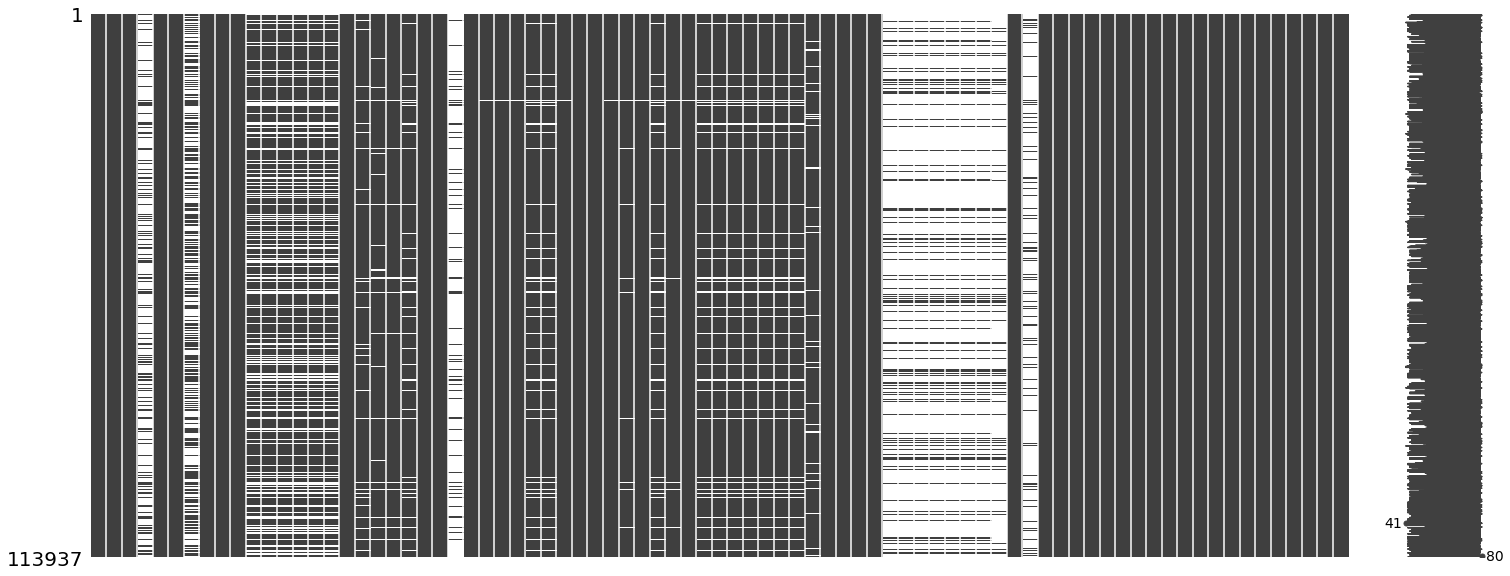

In [6]:
# visualize missing columns
mno.matrix(data);

From the diagram we can see different set of columns that missing values from the same row.

A lot of missing values come from columns that have consistent missing values in other columns. 

In [7]:
data.isna().sum()/len(data)

ListingKey                             0.000000
ListingNumber                          0.000000
ListingCreationDate                    0.000000
CreditGrade                            0.745886
Term                                   0.000000
LoanStatus                             0.000000
ClosedDate                             0.516496
BorrowerAPR                            0.000219
BorrowerRate                           0.000000
LenderYield                            0.000000
EstimatedEffectiveYield                0.255264
EstimatedLoss                          0.255264
EstimatedReturn                        0.255264
ProsperRating (numeric)                0.255264
ProsperRating (Alpha)                  0.255264
ProsperScore                           0.255264
ListingCategory (numeric)              0.000000
BorrowerState                          0.048404
Occupation                             0.031491
EmploymentStatus                       0.019792
EmploymentStatusDuration               0

In [8]:
data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780,640.0,659.0,2001-10-11,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaT,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14.000,680.0,699.0,1996-03-18,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060,480.0,499.0,2002-07-27,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaT,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32.000,800.0,819.0,1983-02-28,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaT,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,True,False,NaN,2013-09-14 18:38:44.000,680.0,699.0,2004-02-20,19.0,19.0,49.0,6,220.0,1.0,9.0,0.0,0.

Consider all data points after July 2009 since a quite a number of features were collected after July 2009. We will dispose all the known values for the CreditRating because only loans before 2009 had this feature. However, we can use ProperRating as a substitute to this column

In [9]:
data = data.query("ListingCreationDate >= '2009-08-1'")

In [10]:
(data.isna().sum()/len(data)).tail(40)

BankcardUtilization                    0.000000
AvailableBankcardCredit                0.000000
TotalTrades                            0.000000
TradesNeverDelinquent (percentage)     0.000000
TradesOpenedLast6Months                0.000000
DebtToIncomeRatio                      0.085991
IncomeRange                            0.000000
IncomeVerifiable                       0.000000
StatedMonthlyIncome                    0.000000
LoanKey                                0.000000
TotalProsperLoans                      0.767550
TotalProsperPaymentsBilled             0.767550
OnTimeProsperPayments                  0.767550
ProsperPaymentsLessThanOneMonthLate    0.767550
ProsperPaymentsOneMonthPlusLate        0.767550
ProsperPrincipalBorrowed               0.767550
ProsperPrincipalOutstanding            0.767550
ScorexChangeAtTimeOfListing            0.804812
LoanCurrentDaysDelinquent              0.000000
LoanFirstDefaultedCycleNumber          0.926469
LoanMonthsSinceOrigination             0

We could leave the `ClosingDate` column (it can be useful when analysing loans that have been closed), we will fill null values in the `Occupation` column with null, we will drop all the missing data points in `EmploymentStatusDuration` and `DebtToIncomeRatio` and fill `TotalProsperLoans` with 0.

In [11]:
data.Occupation.fillna("Unknown",inplace=True)

data.dropna(inplace=True,subset=["DebtToIncomeRatio","EmploymentStatusDuration"])

data.TotalProsperLoans.fillna(0,inplace=True)

data.reset_index(inplace=True,drop=True)

Drop columns that are duplicated or unnecessary to the analysis.

In [12]:
cols_to_drop = ["Term","CreditGrade","ListingKey", "ListingNumber", "ProsperRating (numeric)", "GroupKey", "DateCreditPulled", "FirstRecordedCreditLine", "TotalCreditLinespast7years", "OpenRevolvingAccounts", "OpenRevolvingMonthlyPayment", "InquiriesLast6Months", "TotalInquiries", "CurrentDelinquencies", "AmountDelinquent", "DelinquenciesLast7Years", "PublicRecordsLast10Years", "PublicRecordsLast12Months", "TotalTrades", "TradesNeverDelinquent (percentage)", "TradesOpenedLast6Months", "IncomeVerifiable", "LoanKey", "TotalProsperPaymentsBilled", "OnTimeProsperPayments",  "ProsperPaymentsLessThanOneMonthLate", "ProsperPaymentsOneMonthPlusLate", "ProsperPrincipalBorrowed", "ProsperPrincipalOutstanding", "ScorexChangeAtTimeOfListing", "LoanFirstDefaultedCycleNumber", "LoanMonthsSinceOrigination", "LoanNumber", "LoanOriginationQuarter", "MemberKey", "LP_CustomerPayments", "LP_CustomerPrincipalPayments", "LP_InterestandFees", "LP_ServiceFees", "LP_CollectionFees", "LP_GrossPrincipalLoss", "LP_NetPrincipalLoss", "LP_NonPrincipalRecoverypayments", "PercentFunded", "Recommendations", "InvestmentFromFriendsCount", "InvestmentFromFriendsAmount", "Investors","ListingCreationDate","BorrowerRate", "LenderYield", 	"EstimatedEffectiveYield", "EstimatedReturn", "BorrowerState", "Occupation", "EmploymentStatus", "EmploymentStatusDuration", "IsBorrowerHomeowner", "CurrentCreditLines", "LoanOriginationDate"]

data.drop(cols_to_drop,1,inplace=True)

In [13]:
data.isna().sum()

LoanStatus                       0
ClosedDate                   54514
BorrowerAPR                      0
EstimatedLoss                    0
ProsperRating (Alpha)            0
ProsperScore                     0
ListingCategory (numeric)        0
CurrentlyInGroup                 0
CreditScoreRangeLower            0
CreditScoreRangeUpper            0
OpenCreditLines                  0
RevolvingCreditBalance           0
BankcardUtilization              0
AvailableBankcardCredit          0
DebtToIncomeRatio                0
IncomeRange                      0
StatedMonthlyIncome              0
TotalProsperLoans                0
LoanCurrentDaysDelinquent        0
LoanOriginalAmount               0
MonthlyLoanPayment               0
dtype: int64

In [14]:
data.LoanStatus = data.LoanStatus.apply(lambda x: "Past Due" if x[:8] == "Past Due" else x)

In [15]:
# drop the unemployed person since he is a single person
data.drop(data[data.IncomeRange=="Not employed"].index,inplace=True)
data.reset_index(drop=True,inplace=True)

### What is the structure of your dataset?

Our data consists of 77376 thousand data points which include columns like 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'EstimatedLoss', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)','CreditScoreRangeLower' 'OpenCreditLines''AvailableBankcardCredit', 'DebtToIncomeRatio', 'IncomeRange', 'StatedMonthlyIncome', 'TotalProsperLoans', etc

### What is/are the main feature(s) of interest in your dataset?

I want to explore loans may differ for people in different income levels.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The IncomeRange, StatedMonthlyIncome, LoanStatus, BorrowerAPR, OpenCreditLines, DebttoIncomeRatio, TotalProsperLoans

In [16]:
data.to_csv("processed.csv",index=False)

## Univariate Exploration

Let's start with the the checking the distribution of the peoples monthly income

### Question: What's the distribution of Income like?

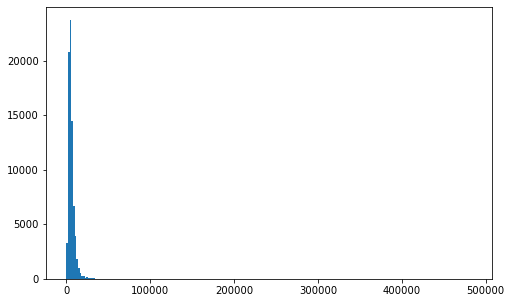

In [17]:
# create bin size
binsize = 2000
bins = np.arange(0, data['StatedMonthlyIncome'].max()+binsize, binsize)

#plot continuous distribution of income
plt.figure(figsize=[8, 5])
plt.hist(data = data, x = 'StatedMonthlyIncome', bins = bins);

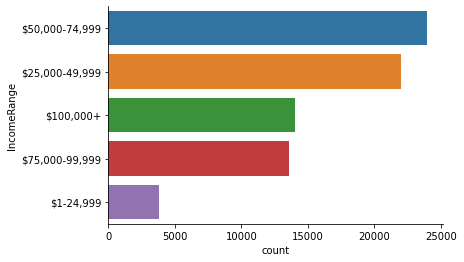

In [18]:
# Visualize in income in categories
ax = sns.countplot(y="IncomeRange", data=data, order = data.IncomeRange.value_counts().index)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False);

### Observation
As expected, it was skewed to the left which means there are a lot more poor people. Most people fall into 25000 to 49999 or 50000 to 74999 range. A very small percentage had 1 to 24999 dollars per year.

### Question: How many loans distributed on across the various loan status?

Current                   52468
Completed                 17551
Chargedoff                 4434
Past Due                   1857
Defaulted                   877
FinalPaymentInProgress      189
Name: LoanStatus, dtype: int64


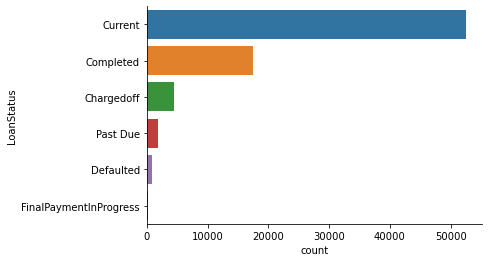

In [19]:
print(data.LoanStatus.value_counts())

ax = sns.countplot(y="LoanStatus", data=data, order = data.LoanStatus.value_counts().index)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False);

### Observation
From the above we could see that a bunch of the loans are still being paid and definitely a large amount of loans are usually paid off and only about a quarter is written off a bad debt. We could look look at the distribution of people over their income ranges next.

In [20]:
data.head()

,LoanStatus,ClosedDate,BorrowerAPR,EstimatedLoss,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),CurrentlyInGroup,CreditScoreRangeLower,CreditScoreRangeUpper,OpenCreditLines,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,TotalProsperLoans,LoanCurrentDaysDelinquent,LoanOriginalAmount,MonthlyLoanPayment
0,Current,NaT,0.12016,0.0249,A,7.0,2,False,680.0,699.0,14.0,3989.0,0.21,10266.0,0.18,"$50,000-74,999",6125.000000,0.0,0,10000,318.93
1,Current,NaT,0.12528,0.0249,A,9.0,16,False,800.0,819.0,5.0,1444.0,0.04,30754.0,0.15,"$25,000-49,999",2875.000000,0.0,0,10000,321.45
2,Current,NaT,0.24614,0.0925,D,4.0,2,False,680.0,699.0,19.0,6193.0,0.81,695.0,0.26,"$100,000+",9583.333333,1.0,0,15000,563.97
3,Current,NaT,0.15425,0.0449,B,10.0,1,False,740.0,759.0,17.0,62999.0,0.39,86509.0,0.36,"$100,000+",8333.333333,0.0,0,15000,342.37
4,Current,NaT,0.31032,0.1275,E,2.0,1,False,680.0,699.0,7.0,5812.0,0.72,1929.0,0.27,"$25,000-49,999",2083.333333,0.0,0,3000,122.67


C     16850
B     14614
A     13663
D     12797
E      8607
HR     5727
AA     5118
Name: ProsperRating (Alpha), dtype: int64


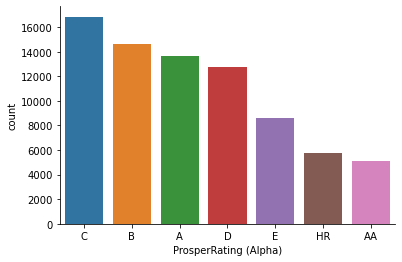

In [21]:
print(data["ProsperRating (Alpha)"].value_counts())
ax = sns.countplot(x = "ProsperRating (Alpha)", data=data, order = data["ProsperRating (Alpha)"].value_counts().index)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False);

### Observation
This shows that most loans are in the C category. [link](https://www.hrratings.com/methodology/rating_scales.xhtml) explains each of the categories well. Although I couldn't get a valid explanation for the HR rating. The data dictionary suggest it's the lowest ranking category.

### Question: What's the distribution of the the cost of a loan?

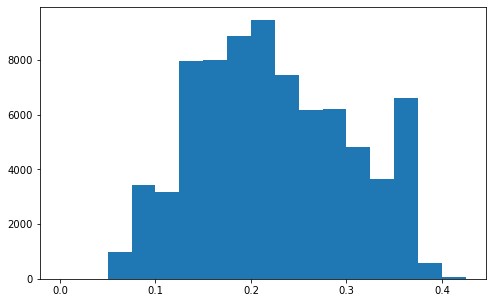

In [22]:
# create bins
binsize = 0.025
bins = np.arange(0, data['BorrowerAPR'].max()+binsize, binsize)

# visualize data
plt.figure(figsize=[8, 5])
plt.hist(data = data, x = 'BorrowerAPR', bins = bins);

### Observation
Looking at the distribution of the BorrowersAPR, we can see that it is normally distributed around 0.2.

### Question: What's the distribution of the Credit Scores?

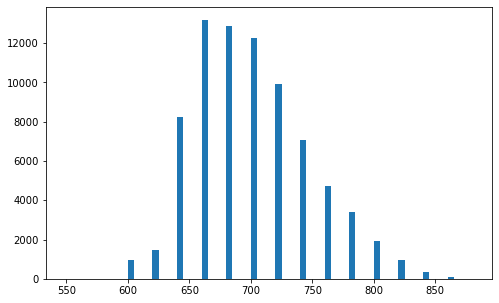

In [23]:
# create bins
binsize = 5
bins = np.arange(550, data['CreditScoreRangeLower'].max()+binsize, binsize)

# visualize bins
plt.figure(figsize=[8, 5])
plt.hist(data = data, x = 'CreditScoreRangeLower', bins = bins);

### Observation
Looking at the distribution of the Credit Scores, looks categorical but that because we are using the lower limit of the credit score range to represent the credit score.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Most of the distributions were expected or at least not out of ordinary and there were no need for transformations. However, I noticed that there were no values of a credit score lower than 600(very close to 580 which is considered the threshold for low credit score), this means Prosper must have been playing it safe all along by not giving people with a low credit score loans.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

None

## Bivariate explorations

### Question what's the percent of defaulted, charged off and settled loans across income levels?

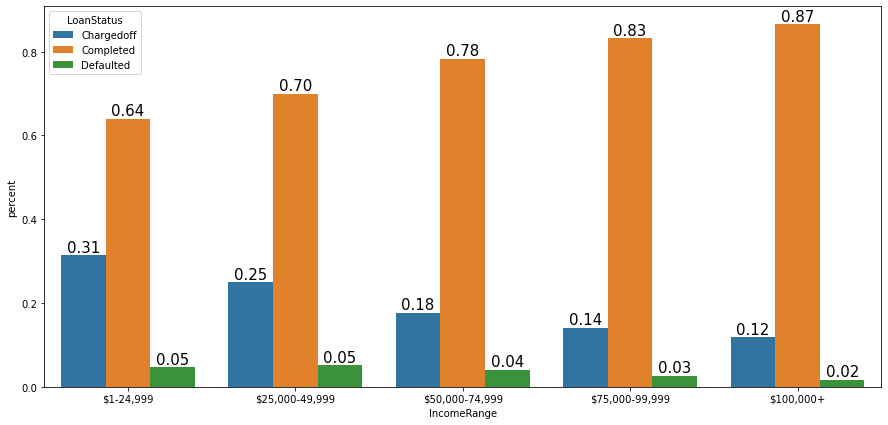

In [24]:
# create a dataframe of count of possible combination IncomeRange and LoanStatus categories
temp_df = data.query("~ClosedDate.isna()").groupby(["IncomeRange","LoanStatus"],as_index=False)["BorrowerAPR"].count()
temp_df.BorrowerAPR = temp_df.BorrowerAPR/temp_df.groupby("IncomeRange",as_index=False)["BorrowerAPR"].transform("sum")["BorrowerAPR"]
temp_df.rename(columns={"BorrowerAPR":"percent"},inplace=True)

#Plot data
plt.figure(figsize=(15,7))
ax = sns.barplot(x="IncomeRange",y="percent",data=temp_df,hue="LoanStatus",order=['$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999' , '$100,000+'])
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.2f}",
        (bar.get_x() + bar.get_width() / 2,bar.get_height()),
        ha='center',
        va='center',
        size=15, 
        xytext=(0, 8),
        textcoords='offset points'
    )

### Observation
From the above graph, we can clearly see that the percent of chargedoff and defaulted loans decreases as we go up in the income brackets

### Question: Does the company recognize the risk in giving poor people loans?

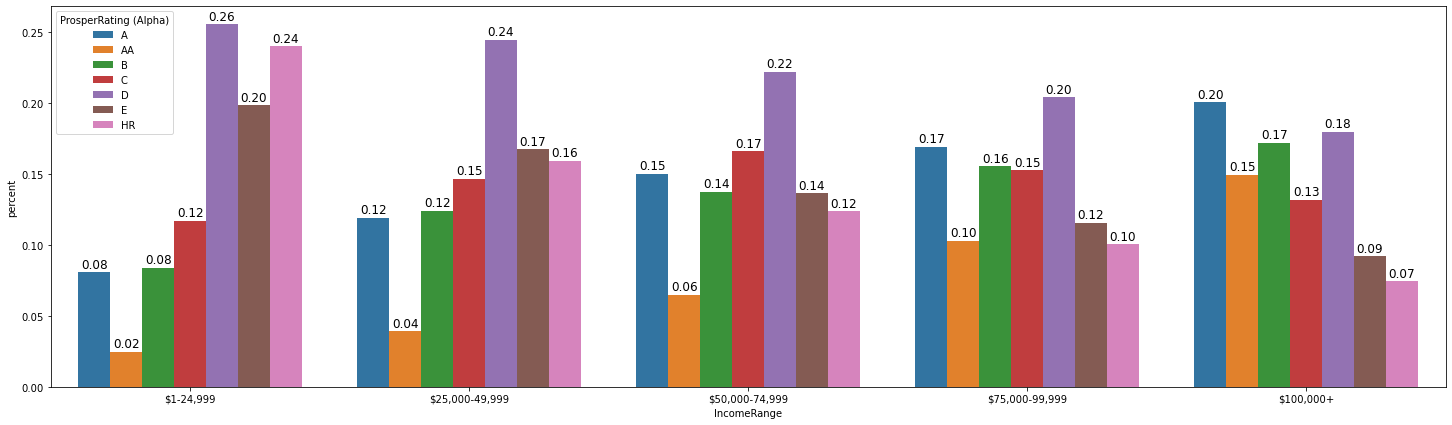

In [25]:
# create a dataframe of count of possible combination IncomeRange and Rating categories
temp_df = data.query("~ClosedDate.isna()").groupby(["IncomeRange","ProsperRating (Alpha)"],as_index=False)["BorrowerAPR"].count()
temp_df.BorrowerAPR = temp_df.BorrowerAPR/temp_df.groupby("IncomeRange",as_index=False)["BorrowerAPR"].transform("sum")["BorrowerAPR"]
temp_df.rename(columns={"BorrowerAPR":"percent"},inplace=True)

#plot data
plt.figure(figsize=(25,7))
ax = sns.barplot(x="IncomeRange",y="percent",data=temp_df,hue="ProsperRating (Alpha)",order=['$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999' , '$100,000+'])
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.2f}",
        (bar.get_x() + bar.get_width() / 2,bar.get_height()),
        ha='center',
        va='center',
        size=12, 
        xytext=(0, 8),
        textcoords='offset points'
    )

### Observations
Yes they do, the rich people's loans are usually rated higher while poorer people are usually rated lower.

### Question: Does this reflect in the cost of loans for poorer people?

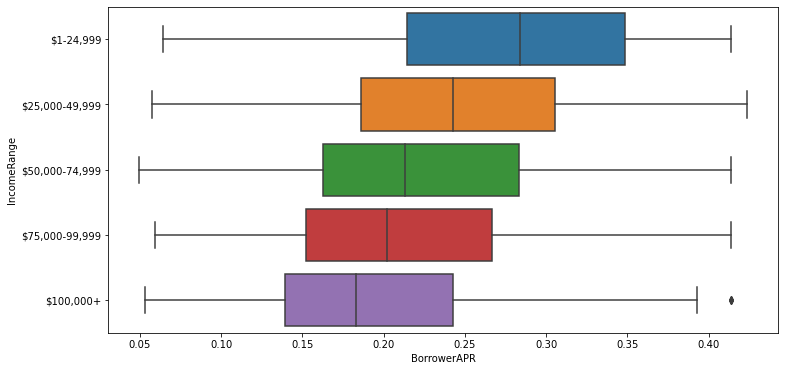

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(x="BorrowerAPR",y="IncomeRange",data=data,order=['$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999' , '$100,000+']);

### Observation
Yes it does, as a consequence of the of the risk tied to borrowing a poor person money as seen in the visualization before this. The lender increases the cost of borrowing for poorer people to compensate for the risk they are taking.

### Question: Are poor people more likely not to get loans because of this cost?

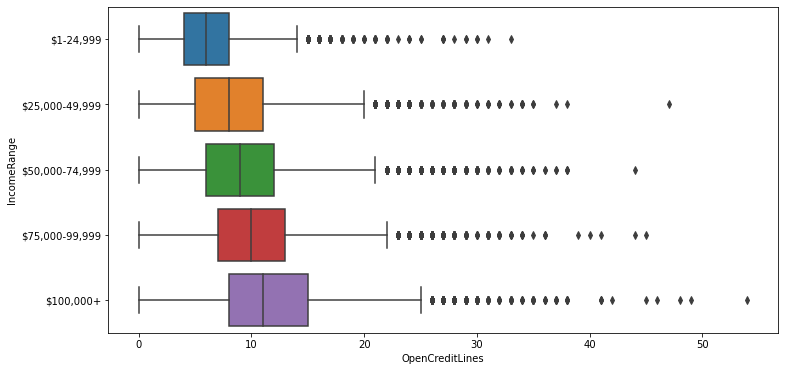

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(x="OpenCreditLines",y="IncomeRange",data=data,order=['$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999' , '$100,000+']);

### Observation
Sadly yes, the rich seems generally have access to more and cheaper loans than the poor because of they are less risky to loan too. It also follows a point Robert Kiyosaki(Rich Dad, Poor Dad) made is that instead of getting out of debt, people should use debt to their advantage.

### Question: Does the loan amount vary among income levels?

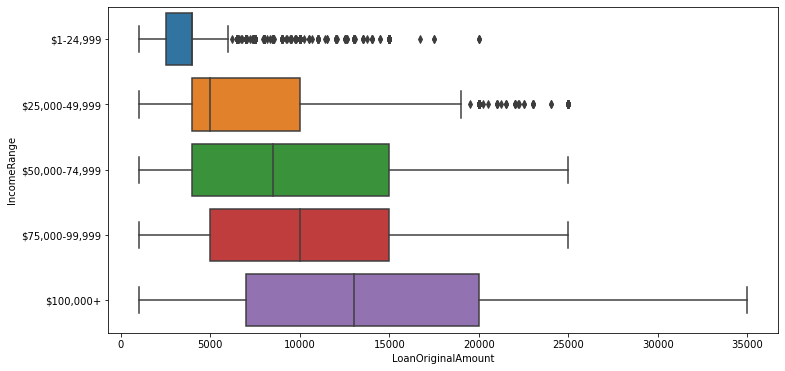

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(x="LoanOriginalAmount",y="IncomeRange",data=data,order=['$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999' , '$100,000+']);

### Observation
Yes it does, the rich also has access to significanty larger loans.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Rich people tend to settle their loans, the companies recognize that their loans are less risky therefore offers cheaper loans to the rich which then encourages the rich to take more loans.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

None

## Multivariate Exploration



### Question: How is the IncomeRange affected by the BorrowerAPR and EstimatedLoss?

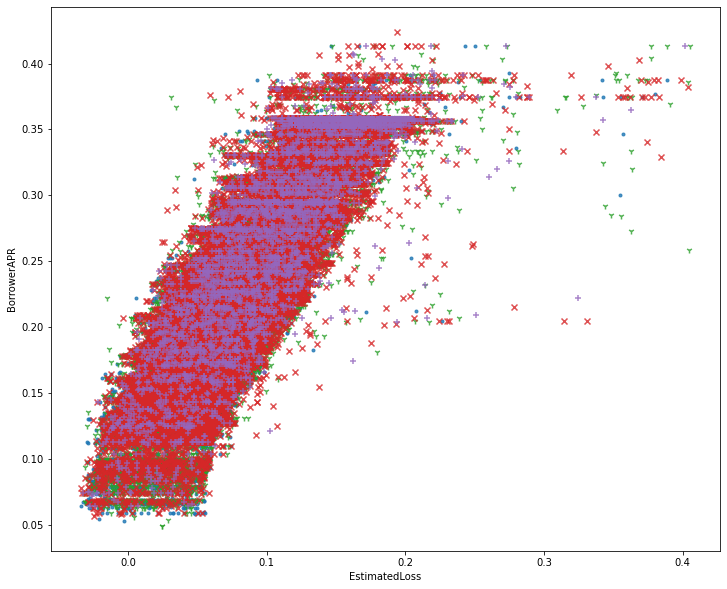

In [29]:
# map markers to categories
markers = [
    ["$100,000+","."],
    ["'$75,000-99,999'","^"],
    ["$50,000-74,999","1"],
    ["$25,000-49,999","x"],
    ["$1-24,999","+"]
]

#plot data
plt.figure(figsize=(12,10))
for income_range,marker in markers:
    temp_df = data[data["IncomeRange"]==income_range]
    sns.regplot(data = temp_df, x = "EstimatedLoss", y = "BorrowerAPR", x_jitter= 0.04, fit_reg = False,marker=marker);

### Observation:
Apart from a positive correlation between the estimated loss and the cost of loan. There is no common relationship between both values and the income range

### Question: How is the rating affected by the BorrowerAPR and EstimatedLoss?

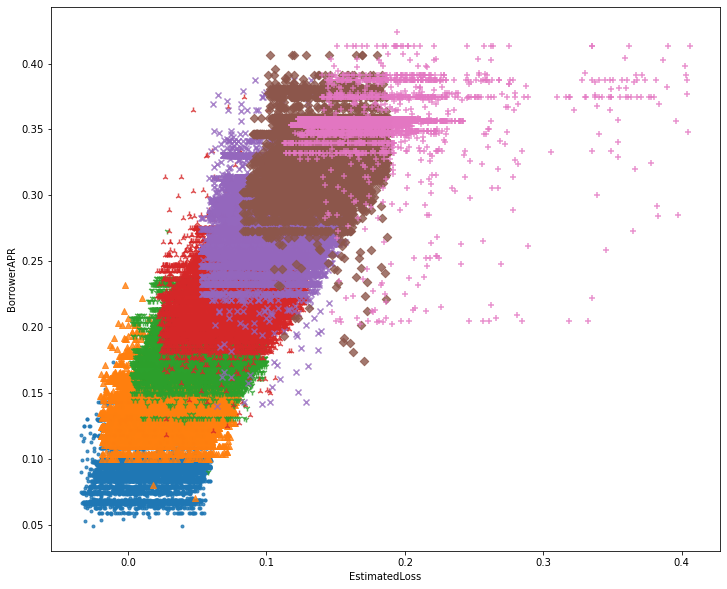

In [30]:
# map markers to categories
markers = [
    ["AA","."],
    ["A","^"],
    ["B","1"],
    ["C","2"],
    ["D","x"],
    ["E","D"],
    ["HR","+"]
]

#plot data
plt.figure(figsize=(12,10))
for rating,marker in markers:
    temp_df = data[data["ProsperRating (Alpha)"]==rating]
    sns.regplot(data = temp_df, x = "EstimatedLoss", y = "BorrowerAPR", x_jitter= 0.04, fit_reg = False,marker=marker);

### Observation
We noticed that estimated the HR rated loans have the bigges of the estimated loss and also highest cost of loans. Both gets better from E to D to C to B to A to AA.

## Conclusions
In summary, loans are very much beneficial to the rich unlike their poorer counterparts.